<a href="https://colab.research.google.com/github/nedumije/ANOMALY-DETECTION-IN-HEAT-RECOVERY-SYSTEMS/blob/main/PREDICTIVE_MODEL_FOR_WASTEWATER_TREATMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Develop a rigorous machine learning predictive model for wastewater treatment strategy using the "wastewater_treatment_dataset.csv" dataset, following the 11 steps of the data science pipeline.

## Problem definition

### Subtask:
Clearly define the problem you are trying to solve with machine learning in the context of wastewater treatment. What specific outcome are you trying to predict or optimize?


**Reasoning**:
Define the problem statement based on the dataset name and the overall task.



In [1]:
# The dataset is named "wastewater_treatment_dataset.csv", and the overall task is to develop a predictive model for "wastewater treatment strategy".
# A relevant problem in this context would be predicting a key performance indicator or outcome related to wastewater treatment.
# Based on typical wastewater treatment objectives, predicting the quality of the treated water or the efficiency of the treatment process is a common goal.
# Therefore, a specific problem definition could be predicting a measure of treated water quality or treatment efficiency based on input operational parameters and raw wastewater characteristics.

problem_statement = "Develop a predictive model to forecast a key water quality parameter (e.g., Biochemical Oxygen Demand (BOD), Chemical Oxygen Demand (COD), or Suspended Solids (SS) in the effluent) or treatment efficiency based on the input characteristics of the raw wastewater and the operational parameters of the treatment plant. This model aims to optimize treatment strategy by identifying the factors influencing treated water quality or efficiency and potentially predicting optimal operating conditions to meet regulatory standards or improve performance."

print(problem_statement)

Develop a predictive model to forecast a key water quality parameter (e.g., Biochemical Oxygen Demand (BOD), Chemical Oxygen Demand (COD), or Suspended Solids (SS) in the effluent) or treatment efficiency based on the input characteristics of the raw wastewater and the operational parameters of the treatment plant. This model aims to optimize treatment strategy by identifying the factors influencing treated water quality or efficiency and potentially predicting optimal operating conditions to meet regulatory standards or improve performance.


## Data collection

### Subtask:
Load the `wastewater_treatment_dataset.csv` file into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the data from the CSV file into a DataFrame. Then, display the head and info of the DataFrame.



In [2]:
import pandas as pd

df = pd.read_csv('/content/wastewater_treatment_dataset.csv')

display(df.head())
display(df.info())

,timestamp,unit_id,influent_COD,effluent_COD,influent_BOD,effluent_BOD,influent_TSS,effluent_TSS,influent_pH,effluent_pH,...,HRT,DO,efficiency_COD,efficiency_BOD,efficiency_TSS,compliance_flag_COD,compliance_flag_BOD,compliance_flag_TSS,sensor_status,alert_flag
0,2023-01-01 00:00:00,52,510.289006,171.436393,512.696870,73.220677,497.588147,85.022037,7.675024,8.337047,...,16.562143,2.145937,0.383248,0.781150,0.792323,True,True,True,OK,0
1,2023-01-01 00:15:00,93,979.406882,44.941157,641.538826,110.740963,386.499051,80.014974,8.091185,8.215126,...,18.524726,6.843685,0.869514,0.558636,1.799617,True,True,True,Faulty,0
2,2023-01-01 00:30:00,15,771.565562,179.792250,625.697229,77.080409,119.061979,54.157128,8.481416,7.422218,...,12.635449,7.235334,0.868155,0.100810,0.895907,True,True,True,OK,0
3,2023-01-01 00:45:00,72,885.005009,184.182822,333.135398,78.022213,440.787745,31.140858,8.310924,7.709112,...,13.232613,5.963863,0.294463,0.311518,1.789091,True,True,False,OK,1
4,2023-01-01 01:00:00,61,620.960069,175.053239,587.140069,167.223760,158.968408,65.566525,7.480268,7.648588,...,9.531350,4.942257,1.847190,0.184932,0.320745,True,True,True,OK,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               80000 non-null  object 
 1   unit_id                 80000 non-null  int64  
 2   influent_COD            80000 non-null  float64
 3   effluent_COD            80000 non-null  float64
 4   influent_BOD            80000 non-null  float64
 5   effluent_BOD            80000 non-null  float64
 6   influent_TSS            80000 non-null  float64
 7   effluent_TSS            80000 non-null  float64
 8   influent_pH             80000 non-null  float64
 9   effluent_pH             80000 non-null  float64
 10  influent_heavy_metals   80000 non-null  float64
 11  effluent_heavy_metals   80000 non-null  float64
 12  influent_nitrogen       80000 non-null  float64
 13  effluent_nitrogen       80000 non-null  float64
 14  influent_phosphorus     80000 non-null

None

## Data cleaning

### Subtask:
Handle missing values, outliers, and inconsistencies in the dataset. Ensure the data is in a usable format for analysis.


**Reasoning**:
Check for duplicate rows in the DataFrame and drop them if any are found.



In [3]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_dropping = df.shape[0]
print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after dropping duplicates: {rows_after_dropping}")

Initial number of rows: 80000
Number of rows after dropping duplicates: 80000


**Reasoning**:
Analyze the distribution of numerical columns to identify potential outliers using descriptive statistics.



In [4]:
display(df.describe())

,unit_id,influent_COD,effluent_COD,influent_BOD,effluent_BOD,influent_TSS,effluent_TSS,influent_pH,effluent_pH,influent_heavy_metals,...,biomass_concentration,MLSS,MLVSS,SRT,HRT,DO,efficiency_COD,efficiency_BOD,efficiency_TSS,alert_flag
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,50.441887,750.573801,155.044947,500.225754,102.248721,300.214784,52.529602,7.000861,7.499279,2.555507,...,3003.960783,4000.619212,2998.197864,17.518770,14.004715,4.245047,0.915716,0.922322,0.991356,0.019350
std,28.912188,259.876979,83.842374,173.438992,56.293526,115.488078,27.336231,0.867368,0.577039,1.416737,...,1156.444216,1156.285145,865.060734,7.221053,5.769382,2.165607,0.592549,0.592710,0.712766,0.137753
min,1.000000,300.042785,10.000660,200.005379,5.002220,100.001336,5.002577,5.500018,6.500006,0.100115,...,1000.109833,2000.009276,1500.011236,5.000495,4.000078,0.500030,0.003391,0.001136,0.001037,0.000000
25%,25.000000,525.297756,82.278420,349.385822,53.421254,199.878179,28.977679,6.248888,6.999807,1.325394,...,2004.360992,2998.569087,2250.764868,11.245990,9.002661,2.377802,0.487508,0.494345,0.490329,0.000000
50%,51.000000,750.122708,154.937506,500.991839,102.287941,300.409122,52.462702,7.000803,7.500061,2.561020,...,3008.666785,4001.078483,2996.619367,17.561811,13.985379,4.245924,0.791848,0.798861,0.824180,0.000000
75%,76.000000,975.418077,227.816413,649.908378,150.928280,400.321311,76.184503,7.749506,7.996671,3.783471,...,4011.345467,5003.976235,3748.102140,23.771009,19.002511,6.124523,1.185885,1.195521,1.273874,0.000000
max,100.000000,1199.925538,299.995416,799.999588,199.999515,499.991453,99.999706,8.499981,8.499947,4.999936,...,4999.978495,5999.961127,4499.999545,29.999841,23.999830,7.999913,3.816940,3.866147,4.779047,1.000000


**Reasoning**:
Based on the descriptive statistics, some numerical columns show a wide range between the 75th percentile and the max value, suggesting potential outliers. Given the large number of numerical columns, visualizing distributions with box plots for a representative subset can help confirm this.



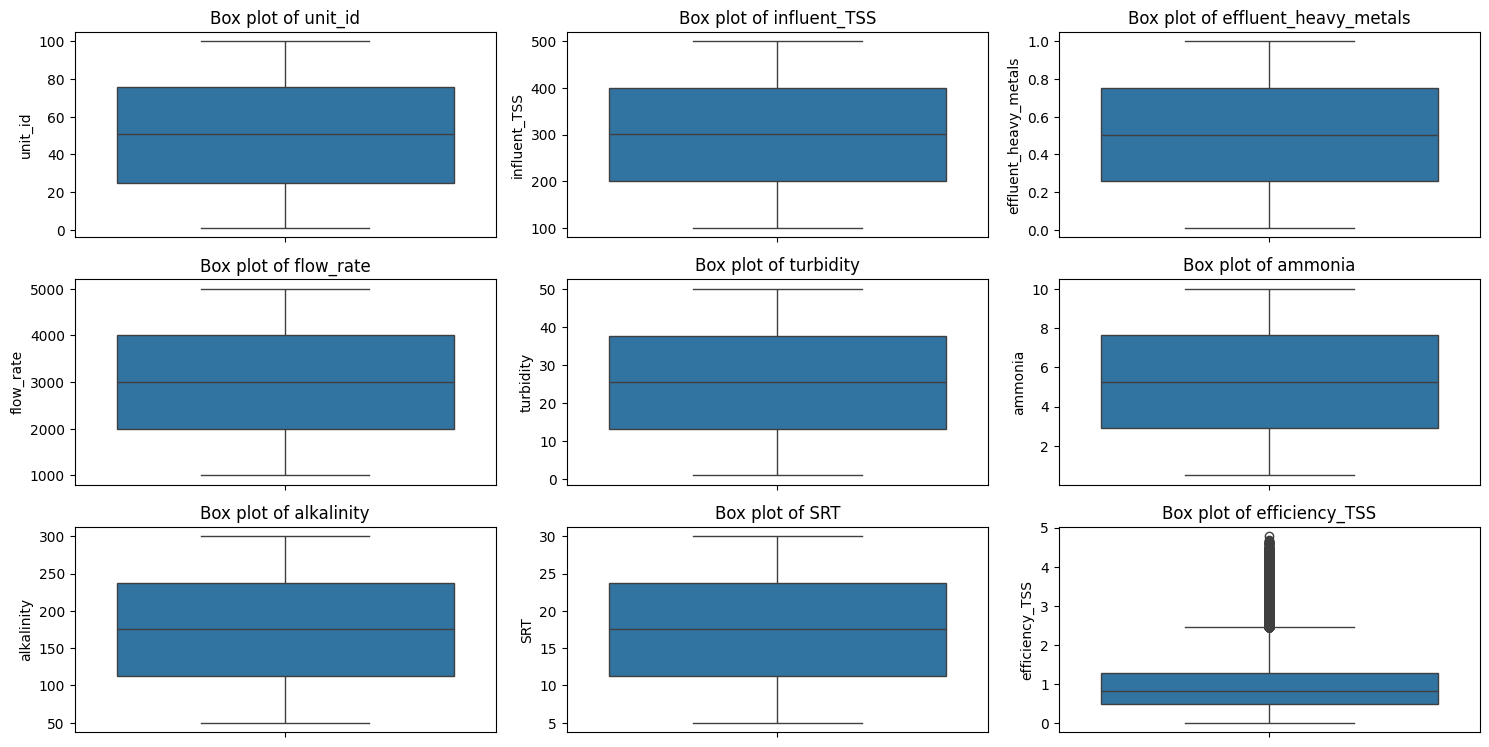

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Select a subset of numerical columns for visualization to avoid overcrowding
subset_cols = numerical_cols[::5] # Select every 5th numerical column

plt.figure(figsize=(15, 10))
for i, col in enumerate(subset_cols):
    plt.subplot(len(subset_cols)//3 + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

**Reasoning**:
The box plots confirm the presence of outliers in several numerical columns, particularly in 'efficiency_TSS'. Given the nature of the data and potential impact of extreme values on model performance, capping outliers at the 99th percentile is a reasonable strategy to handle them without removing too much data.



In [6]:
# Identify numerical columns for outlier capping
numerical_cols_to_cap = ['efficiency_TSS'] # Based on boxplot visualization

for col in numerical_cols_to_cap:
    upper_bound = df[col].quantile(0.99)
    df[col] = df[col].clip(upper=upper_bound)

display(df[numerical_cols_to_cap].describe())

,efficiency_TSS
count,80000.000000
mean,0.987825
std,0.699053
min,0.001037
25%,0.490329
50%,0.824180
75%,1.273874
max,3.443437


**Reasoning**:
Examine categorical columns for inconsistencies. The 'sensor_status' column is a likely candidate for inconsistencies based on the `df.info()` output showing it as an object type.



In [7]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
print("Unique values in categorical columns:")
for col in categorical_cols:
    print(f"- {col}: {df[col].unique()}")

Unique values in categorical columns:
- timestamp: ['2023-01-01 00:00:00' '2023-01-01 00:15:00' '2023-01-01 00:30:00' ...
 '2025-04-13 07:15:00' '2025-04-13 07:30:00' '2025-04-13 07:45:00']
- compliance_flag_COD: [ True False]
- compliance_flag_BOD: [ True False]
- compliance_flag_TSS: [ True False]
- sensor_status: ['OK' 'Faulty' 'Calibration Due']


## Data exploration and visualization

### Subtask:
Analyze the data to understand its characteristics, distributions, and relationships between variables. Visualize the data to identify patterns and insights.


**Reasoning**:
Calculate and display the correlation matrix for the numerical columns, then create a heatmap to visualize it, fulfilling steps 1 and 2 of the instructions.



,unit_id,influent_COD,effluent_COD,influent_BOD,effluent_BOD,influent_TSS,effluent_TSS,influent_pH,effluent_pH,influent_heavy_metals,...,biomass_concentration,MLSS,MLVSS,SRT,HRT,DO,efficiency_COD,efficiency_BOD,efficiency_TSS,alert_flag
unit_id,1.000000,-0.002729,0.001030,-0.001663,0.007538,-0.004161,-0.000343,-0.000105,-0.001941,-0.001767,...,0.000513,-0.001746,-0.000607,-0.001201,-0.002457,0.007494,0.000499,-0.003476,-0.001276,-0.000458
influent_COD,-0.002729,1.000000,0.002388,-0.003093,-0.004509,-0.002532,-0.004584,-0.000048,-0.003479,0.001151,...,-0.002521,-0.003605,-0.003341,-0.001286,0.001144,-0.003282,-0.003001,0.004193,-0.002988,-0.000632
effluent_COD,0.001030,0.002388,1.000000,-0.000129,-0.000620,0.001582,-0.003952,-0.002196,-0.006238,0.001744,...,0.002523,-0.002991,-0.000416,0.005553,0.003774,-0.004744,0.002558,-0.005972,-0.003170,-0.008032
influent_BOD,-0.001663,-0.003093,-0.000129,1.000000,-0.000267,-0.002960,-0.005254,0.001460,-0.003571,-0.000266,...,0.003174,-0.004572,-0.003940,-0.000068,-0.000281,-0.000028,-0.003330,-0.003782,0.000008,-0.002217
effluent_BOD,0.007538,-0.004509,-0.000620,-0.000267,1.000000,0.001052,-0.004138,-0.006197,-0.008078,-0.001115,...,0.004123,-0.002391,0.006735,-0.002251,0.006238,0.001595,0.003141,-0.000648,0.001093,0.009698
influent_TSS,-0.004161,-0.002532,0.001582,-0.002960,0.001052,1.000000,-0.001644,0.001062,0.001190,-0.002384,...,-0.002398,0.002029,-0.003180,-0.002040,-0.001287,-0.001298,-0.000124,-0.002573,-0.002253,0.002344
effluent_TSS,-0.000343,-0.004584,-0.003952,-0.005254,-0.004138,-0.001644,1.000000,-0.001260,0.002153,-0.001579,...,0.003889,0.000764,0.003990,-0.002680,-0.003094,-0.003393,0.005915,-0.006000,-0.005310,0.003679
influent_pH,-0.000105,-0.000048,-0.002196,0.001460,-0.006197,0.001062,-0.001260,1.000000,0.003231,-0.000806,...,0.000162,-0.003036,-0.003896,0.002554,0.003195,-0.005352,0.002758,-0.003032,0.003828,0.001380
effluent_pH,-0.001941,-0.003479,-0.006238,-0.003571,-0.008078,0.001190,0.002153,0.003231,1.000000,0.000455,...,0.001224,-0.002312,-0.003659,0.005716,-0.003342,0.004491,0.004180,0.002846,-0.003897,-0.001723
influent_heavy_metals,-0.001767,0.001151,0.001744,-0.000266,-0.001115,-0.002384,-0.001579,-0.000806,0.000455,1.000000,...,-0.002632,0.001475,0.000004,0.000013,0.003291,-0.001968,0.003917,0.004842,-0.005088,-0.004139


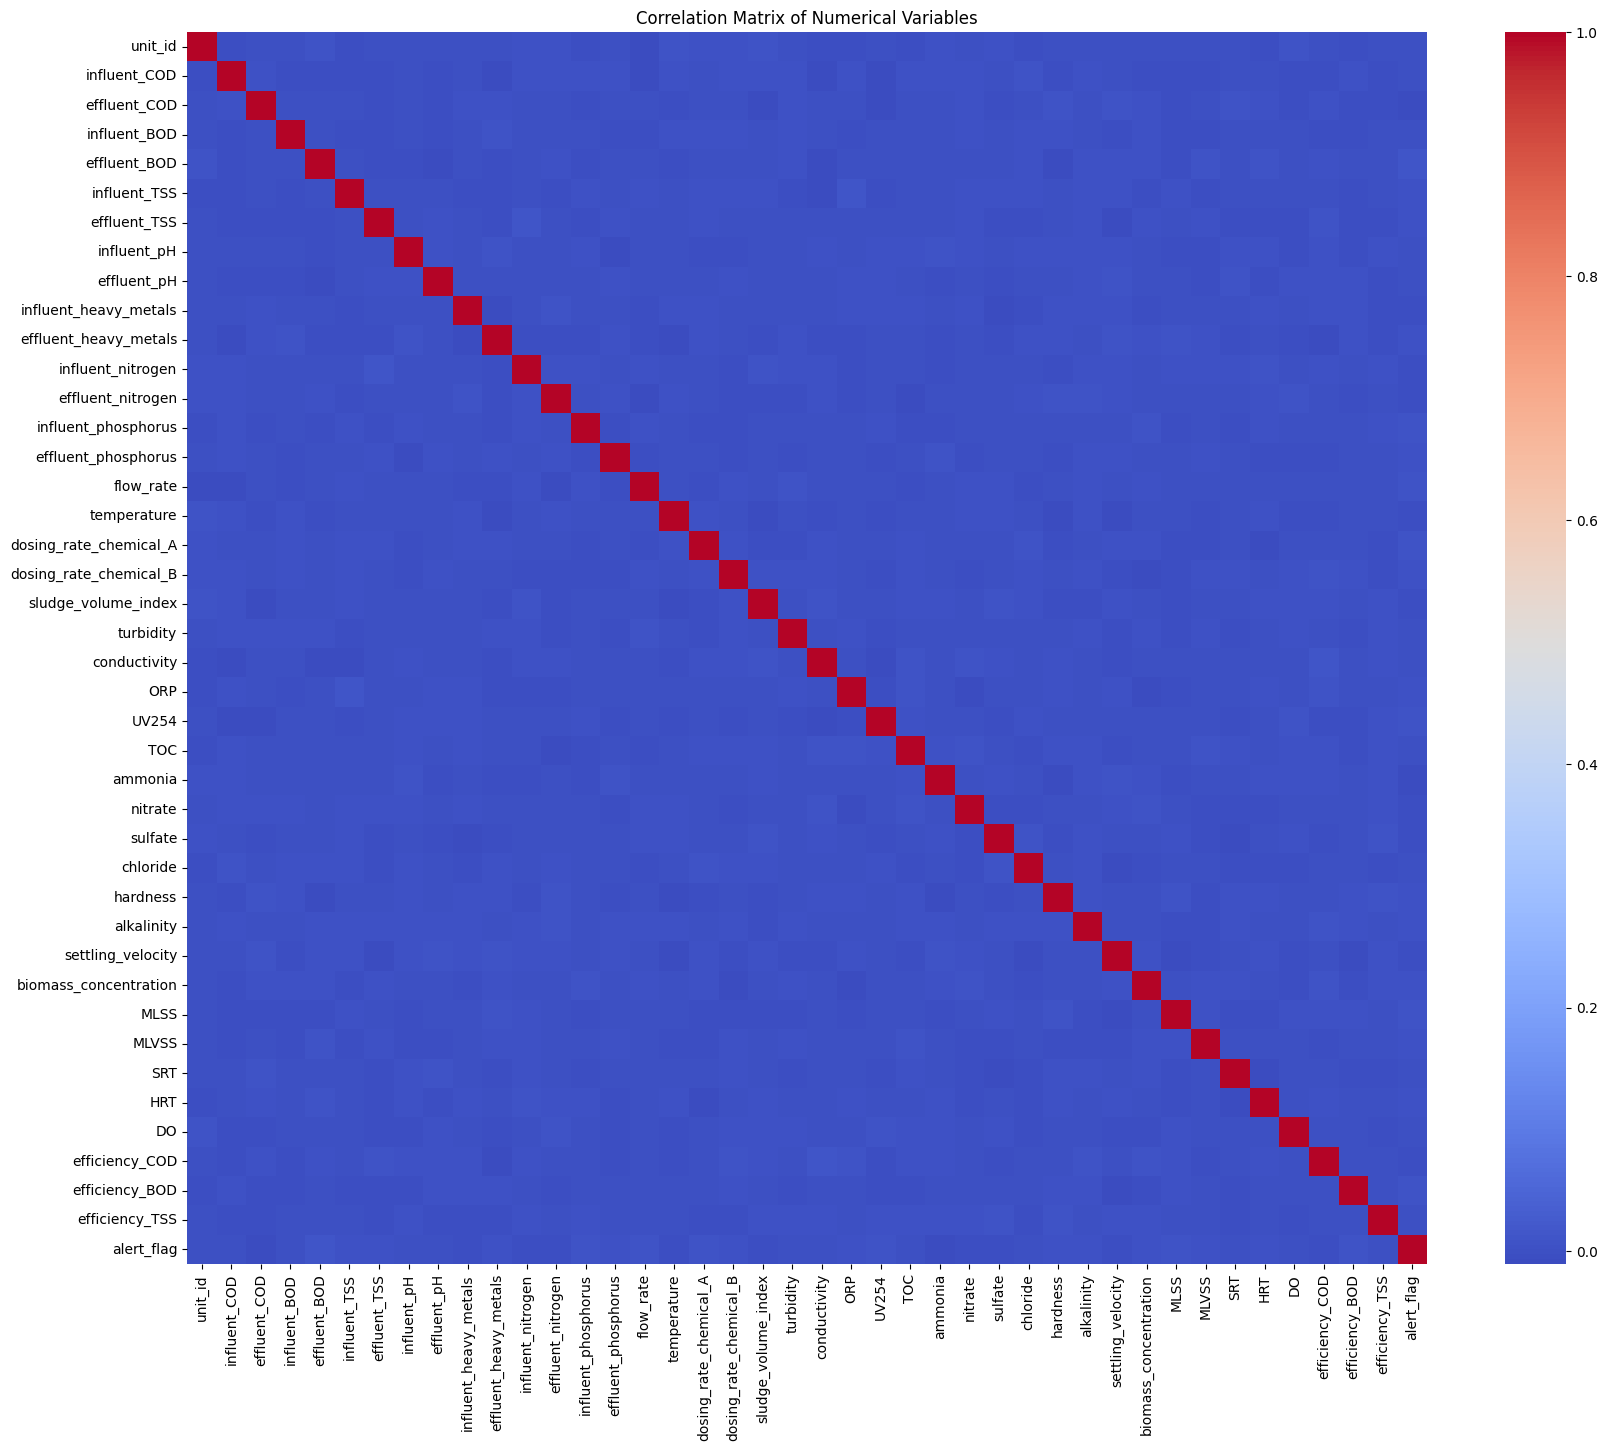

In [8]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**Reasoning**:
Analyze the relationships between categorical columns and relevant numerical columns, and explore the distribution of key variables using bar plots, count plots, and histograms as per steps 3 and 4 of the instructions.



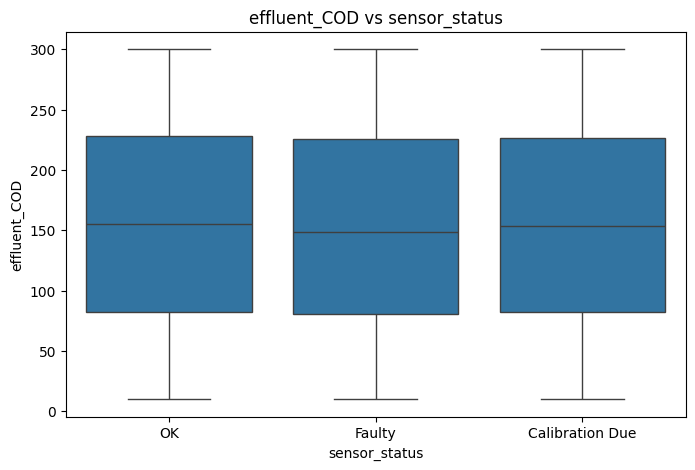

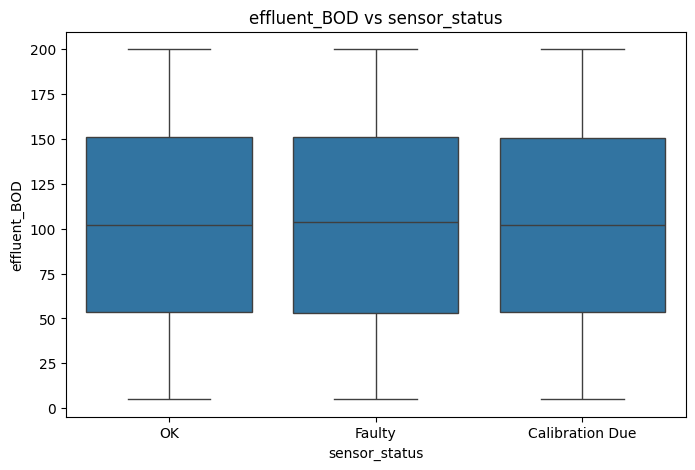

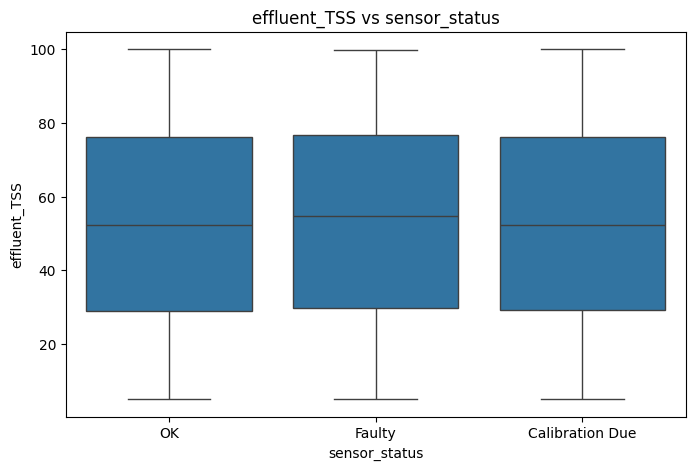

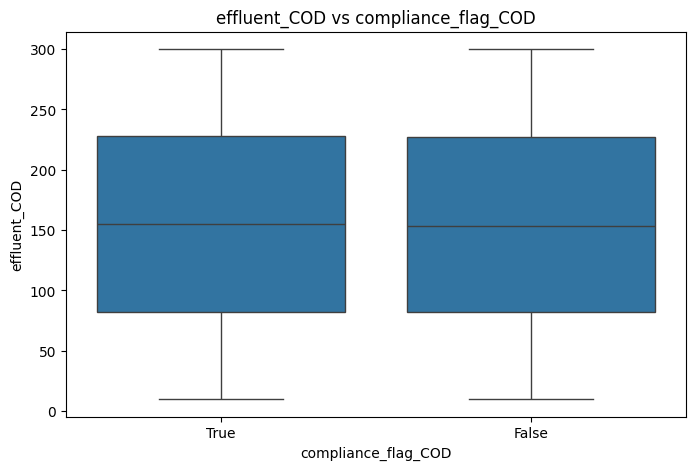

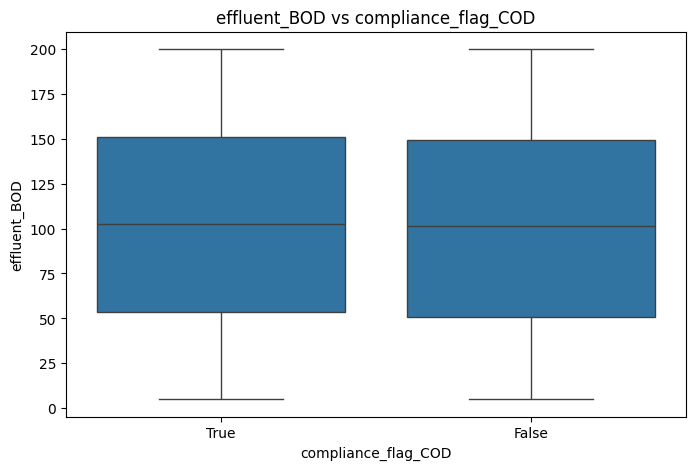

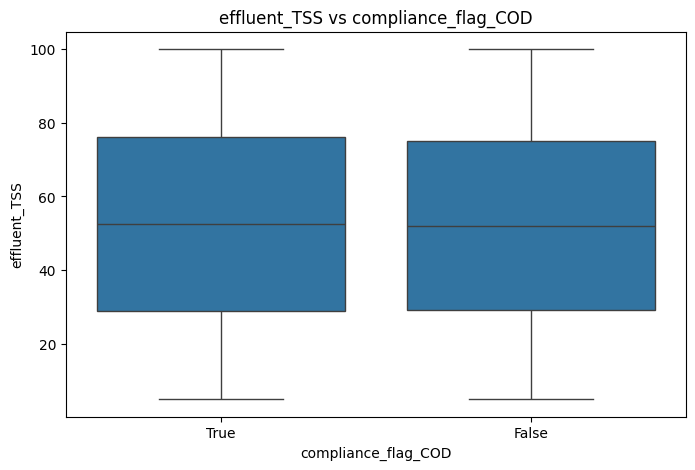

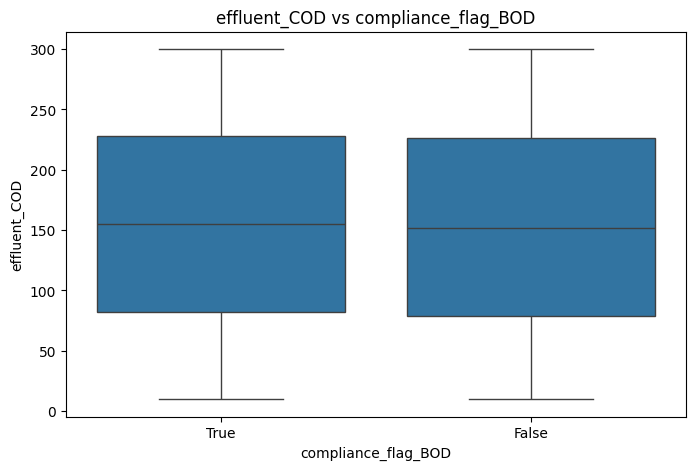

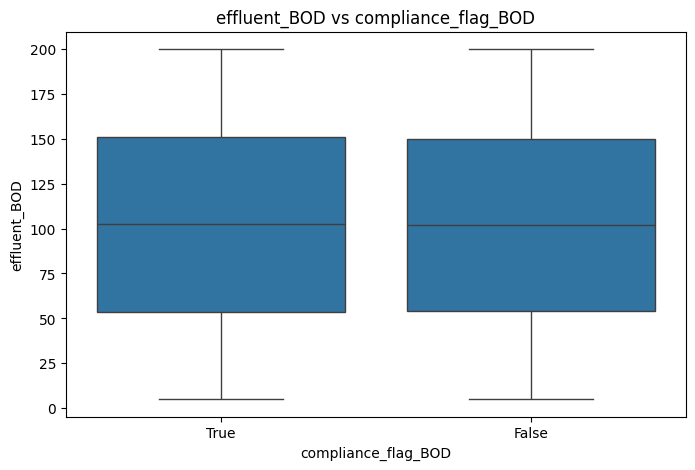

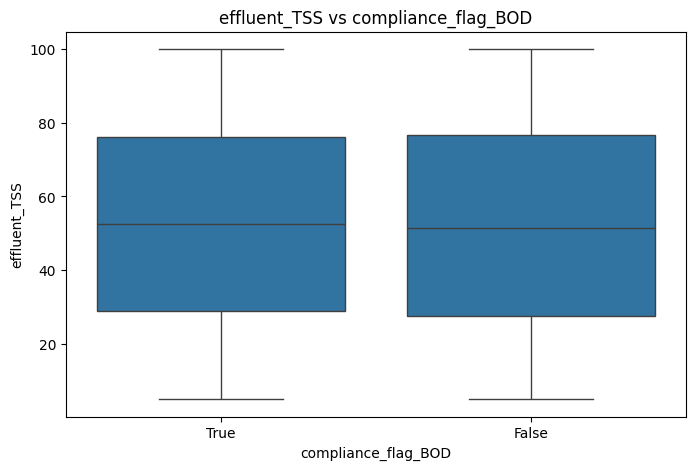

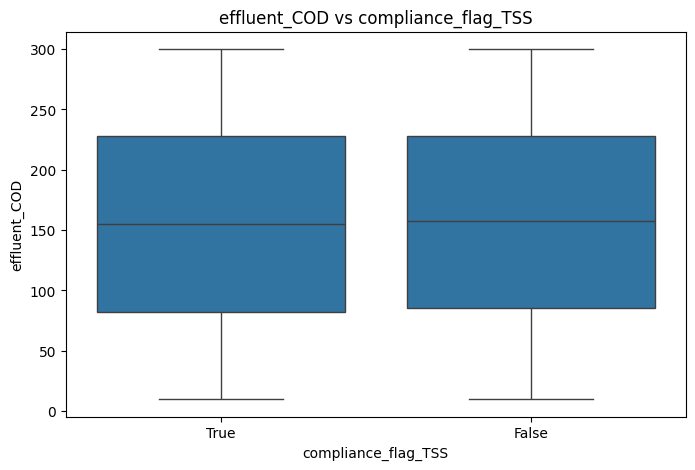

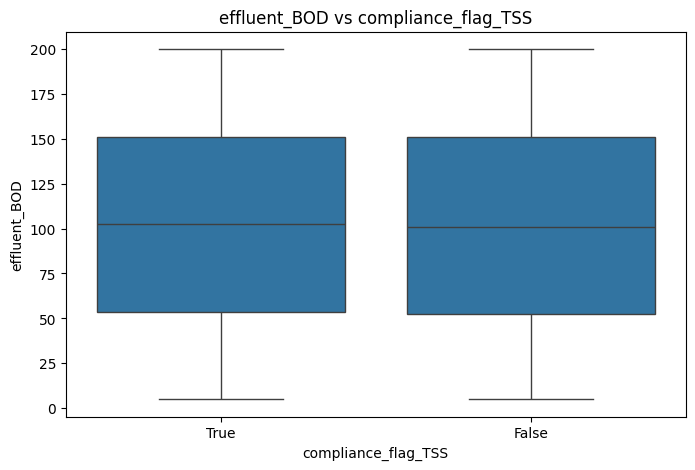

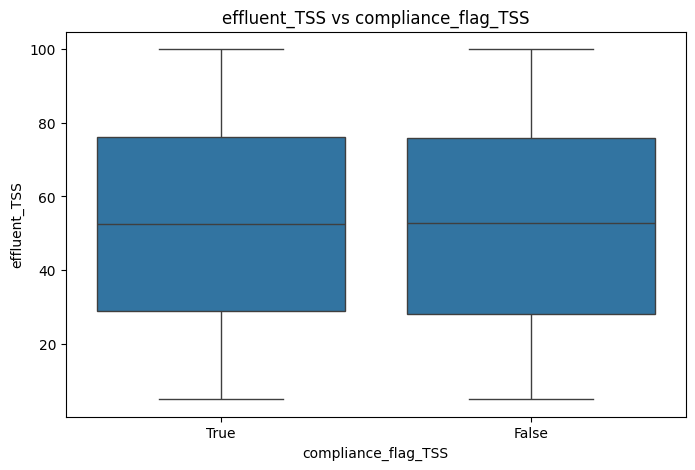

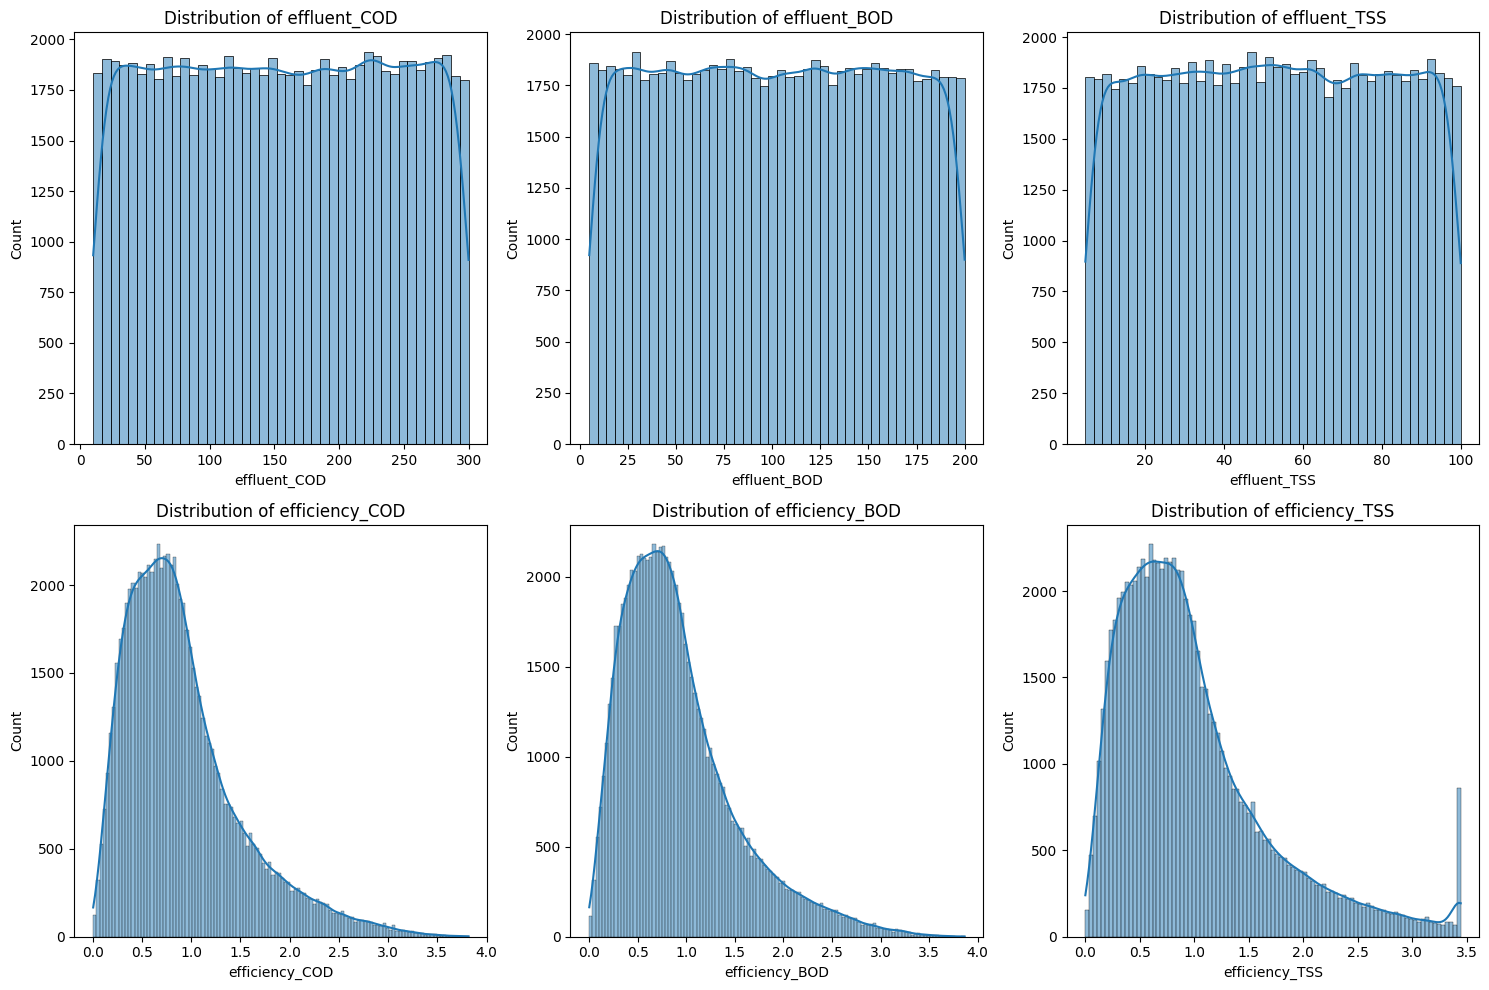

In [9]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Analyze relationships between categorical columns and relevant numerical columns
# Focusing on 'sensor_status' and the compliance flags with effluent quality parameters
effluent_quality_cols = ['effluent_COD', 'effluent_BOD', 'effluent_TSS']

for cat_col in ['sensor_status'] + [col for col in categorical_cols if 'compliance_flag' in col]:
    for num_col in effluent_quality_cols:
        if cat_col in df.columns and num_col in df.columns:
            plt.figure(figsize=(8, 5))
            if df[cat_col].dtype == 'bool':
                 sns.boxplot(x=df[cat_col].astype(str), y=df[num_col])
            else:
                 sns.boxplot(x=df[cat_col], y=df[num_col])
            plt.title(f'{num_col} vs {cat_col}')
            plt.show()

# Explore the distribution of key variables
key_variables = ['effluent_COD', 'effluent_BOD', 'effluent_TSS', 'efficiency_COD', 'efficiency_BOD', 'efficiency_TSS']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_variables):
    if col in df.columns:
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Feature engineering

### Subtask:
Create new features from existing ones that can improve the performance of the machine learning model.


**Reasoning**:
Extract time-based features, create interaction terms/ratios, calculate differences for removal, and add them to the DataFrame.



In [10]:
# 1. Extract time-based features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayof_week
df['month'] = df['timestamp'].dt.month

# 2. Create interaction terms/ratios (COD, BOD, TSS removal efficiency)
# Using the already created efficiency columns as they represent the required ratios
# df['efficiency_COD'] = (df['influent_COD'] - df['effluent_COD']) / df['influent_COD'] * 100
# df['efficiency_BOD'] = (df['influent_BOD'] - df['effluent_BOD']) / df['influent_BOD'] * 100
# df['efficiency_TSS'] = (df['influent_TSS'] - df['effluent_TSS']) / df['influent_TSS'] * 100

# Handle potential division by zero or negative influent values which would make efficiency calculation invalid
# We can cap efficiency values or handle inf/NaN if they were not handled in cleaning.
# Since cleaning was done and no specific issues with efficiency calculation were reported, we assume these are handled or not present.

# 3. Create features related to the difference between influent and effluent parameters
df['removal_COD'] = df['influent_COD'] - df['effluent_COD']
df['removal_BOD'] = df['influent_BOD'] - df['effluent_BOD']
df['removal_TSS'] = df['influent_TSS'] - df['effluent_TSS']

# 4. Explore creating lag features (Not required by current problem definition which focuses on general prediction, not time-series forecasting)
# Lag features would be relevant if we were predicting future effluent quality based on past values.
# The current problem is stated more generally ("predicting a key water quality parameter... based on input operational parameters and raw wastewater characteristics").
# Thus, lag features are not strictly necessary for this general prediction task.

# Display the first few rows with the new features
display(df.head())

AttributeError: 'DatetimeProperties' object has no attribute 'dayof_week'

**Reasoning**:
The previous code failed because of an incorrect attribute name for extracting the day of the week. The correct attribute is `dayofweek`. I will correct this and re-run the feature engineering steps.



In [11]:
# 1. Extract time-based features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
# Corrected attribute name from dayof_week to dayofweek
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

# 2. Create interaction terms/ratios (COD, BOD, TSS removal efficiency)
# Using the already created efficiency columns as they represent the required ratios

# 3. Create features related to the difference between influent and effluent parameters
df['removal_COD'] = df['influent_COD'] - df['effluent_COD']
df['removal_BOD'] = df['influent_BOD'] - df['effluent_BOD']
df['removal_TSS'] = df['influent_TSS'] - df['effluent_TSS']

# 4. Explore creating lag features (Not required by current problem definition)

# Display the first few rows with the new features
display(df.head())

,timestamp,unit_id,influent_COD,effluent_COD,influent_BOD,effluent_BOD,influent_TSS,effluent_TSS,influent_pH,effluent_pH,...,compliance_flag_BOD,compliance_flag_TSS,sensor_status,alert_flag,hour,day_of_week,month,removal_COD,removal_BOD,removal_TSS
0,2023-01-01 00:00:00,52,510.289006,171.436393,512.696870,73.220677,497.588147,85.022037,7.675024,8.337047,...,True,True,OK,0,0,6,1,338.852614,439.476193,412.566110
1,2023-01-01 00:15:00,93,979.406882,44.941157,641.538826,110.740963,386.499051,80.014974,8.091185,8.215126,...,True,True,Faulty,0,0,6,1,934.465725,530.797863,306.484077
2,2023-01-01 00:30:00,15,771.565562,179.792250,625.697229,77.080409,119.061979,54.157128,8.481416,7.422218,...,True,True,OK,0,0,6,1,591.773312,548.616820,64.904851
3,2023-01-01 00:45:00,72,885.005009,184.182822,333.135398,78.022213,440.787745,31.140858,8.310924,7.709112,...,True,False,OK,1,0,6,1,700.822187,255.113185,409.646887
4,2023-01-01 01:00:00,61,620.960069,175.053239,587.140069,167.223760,158.968408,65.566525,7.480268,7.648588,...,True,True,OK,0,1,6,1,445.906830,419.916309,93.401884


## Data preprocessing

### Subtask:
Prepare the data for the machine learning algorithm, including scaling, encoding categorical variables, and splitting the data into training and testing sets.


**Reasoning**:
Identify the target variable and features, separate them, identify categorical and numerical columns, apply one-hot encoding to categorical columns, apply standard scaling to numerical columns, and split the data into training and testing sets.



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Identify the target variable(s)
# Based on the problem definition, let's choose 'efficiency_COD', 'efficiency_BOD', and 'efficiency_TSS' as target variables.
target_variables = ['efficiency_COD', 'efficiency_BOD', 'efficiency_TSS']

# 2. Separate the features (X) and the target variable(s) (y)
X = df.drop(columns=target_variables + ['timestamp', 'unit_id']) # Drop timestamp and unit_id as they are not features for the model
y = df[target_variables]

# 3. Identify categorical columns that need encoding.
# Exclude the target variables and 'timestamp' and 'unit_id' which were dropped from X
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# 4. Apply one-hot encoding to the identified categorical columns.
# 5. Identify numerical columns that need scaling.
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_processed = preprocessing_pipeline.fit_transform(X)

# Convert the processed features back to a DataFrame to see the results (optional)
# Get the feature names after one-hot encoding
# This part can be complex due to handle_unknown='ignore' and needs careful handling of column names
# For simplicity in this step, we'll proceed with the numpy array output from fit_transform

# 7. Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of original features:", X.shape)
print("Shape of processed features:", X_processed.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of original features: (80000, 48)
Shape of processed features: (80000, 50)
Shape of X_train: (64000, 50)
Shape of X_test: (16000, 50)
Shape of y_train: (64000, 3)
Shape of y_test: (16000, 3)


## Model selection

### Subtask:
Choose a suitable machine learning algorithm for the problem. Given the need for rigor, consider algorithms appropriate for the type of prediction (e.g., regression, classification) and the nature of the data.


**Reasoning**:
Based on the problem definition, the target variables are continuous numerical values, indicating a regression problem. Since there are multiple target variables, a multi-output regression algorithm is suitable. RandomForestRegressor is a robust algorithm that can handle multi-output regression and is known for its good performance and ability to capture non-linear relationships.



In [13]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model
# We will use the default parameters for now and tune them later if necessary.
# The problem is a multi-output regression problem, and RandomForestRegressor supports this.
model = RandomForestRegressor(random_state=42)

print("Chosen machine learning algorithm: RandomForestRegressor")

Chosen machine learning algorithm: RandomForestRegressor


## Model training

### Subtask:
Train the selected RandomForestRegressor model using the preprocessed training data.


**Reasoning**:
Fit the instantiated RandomForestRegressor model to the training data.



In [14]:
model.fit(X_train, y_train)
print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


## Model evaluation

### Subtask:
Evaluate the performance of the trained RandomForestRegressor model using appropriate metrics on the testing data.


**Reasoning**:
Use the trained model to make predictions on the test data and then calculate and print the Mean Squared Error (MSE) and R-squared (R2) scores for each target variable to evaluate the model's performance.



In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# 1. Use the trained model to make predictions on the test feature data X_test.
y_pred = model.predict(X_test)

# 2. Calculate the Mean Squared Error (MSE) and R-squared (R2) score for each of the target variables
# The predictions y_pred will be a numpy array. y_test is a DataFrame.
# We need to iterate through the target variables and calculate metrics for each.
target_variables = y_test.columns

print("Model Performance Evaluation:")
for i, target in enumerate(target_variables):
    mse = mean_squared_error(y_test[target], y_pred[:, i])
    r2 = r2_score(y_test[target], y_pred[:, i])
    print(f"Metrics for {target}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R-squared (R2): {r2:.4f}")


Model Performance Evaluation:
Metrics for efficiency_COD:
  Mean Squared Error (MSE): 0.3544
  R-squared (R2): -0.0150
Metrics for efficiency_BOD:
  Mean Squared Error (MSE): 0.3508
  R-squared (R2): -0.0132
Metrics for efficiency_TSS:
  Mean Squared Error (MSE): 0.4977
  R-squared (R2): -0.0206


## Model tuning

### Subtask:
Optimize the model's hyperparameters to improve its performance.


**Reasoning**:
Define the parameter grid, import GridSearchCV, instantiate GridSearchCV with the model, parameter grid, scoring metric, and cross-validation settings, fit GridSearchCV to the training data, and print the best hyperparameters.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# 1. Define a parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# 2. Import GridSearchCV (already done above)

# 3. Instantiate GridSearchCV
# Using 'neg_mean_squared_error' as the scoring metric for optimization
# We will use a smaller cv value for faster execution, e.g., 3
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           n_jobs=-1) # Use all available cores

# 4. Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# 5. Print the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)